# 1. Apply logistic regression.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\abdel\Downloads\logistic_regression_dataset.csv')

missing_values = df.isnull().sum()

print("Missing values per column:\n", missing_values)

df_cleaned = df.dropna()
missing_values = df_cleaned.isnull().sum()

print("Missing values per column:\n", missing_values)

Missing values per column:
 id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64
Missing values per column:
 id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [24]:
df_encoded = pd.get_dummies(df_cleaned, columns=['sex', 'is_smoking'], drop_first=True)
print("Encoded dataset:\n", df_encoded.head())

Encoded dataset:
    id  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1   1   36        4.0         0.0     0.0                0             1   
2   2   46        1.0        10.0     0.0                0             0   
3   3   50        1.0        20.0     0.0                0             1   
4   4   64        1.0        30.0     0.0                0             0   
5   5   61        3.0         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
1         0    212.0  168.0   98.0  29.77       72.0     75.0         0.0   
2         0    250.0  116.0   71.0  20.35       88.0     94.0         0.0   
3         0    233.0  158.0   88.0  28.26       68.0     94.0         1.0   
4         0    241.0  136.5   85.0  26.42       70.0     77.0         0.0   
5         0    272.0  182.0  121.0  32.80       85.0     65.0         1.0   

   sex_M  is_smoking_YES  
1   True           False  
2  False

In [25]:
correlation_matrix = df_encoded.corr()
correlation_with_target = correlation_matrix['TenYearCHD'].sort_values(ascending=False)
print("Correlation between TenYearCHD and other variables:\n", correlation_with_target)

Correlation between TenYearCHD and other variables:
 TenYearCHD         1.000000
age                0.234423
sysBP              0.217419
prevalentHyp       0.169136
diaBP              0.139005
glucose            0.133286
totChol            0.106473
diabetes           0.100006
BPMeds             0.092868
sex_M              0.081880
BMI                0.075950
cigsPerDay         0.059797
prevalentStroke    0.052014
is_smoking_YES     0.033342
heartRate          0.018747
id                 0.010901
education         -0.062442
Name: TenYearCHD, dtype: float64


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_features = ['age', 'sysBP', 'prevalentHyp', 'glucose', 'diaBP', 'diabetes']

X_selected = df_encoded[selected_features]
y_selected = df_encoded['TenYearCHD']

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

logreg_model_selected = LogisticRegression(random_state=42)

logreg_model_selected.fit(X_train_selected, y_train_selected)

y_pred_selected = logreg_model_selected.predict(X_test_selected)

# 2. Use a confusion matrix to validate your model. 

In [31]:
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

tn, fp, fn, tp = conf_matrix_selected.ravel()

accuracy = accuracy_score(y_test_selected, y_pred_selected)
precision = precision_score(y_test_selected, y_pred_selected)
recall = recall_score(y_test_selected, y_pred_selected)
f1 = f1_score(y_test_selected, y_pred_selected)

print("Confusion Matrix:")
print(conf_matrix_selected)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[495   1]
 [ 87   3]]

Metrics:
Accuracy: 0.8498
Precision: 0.7500
Recall: 0.0333
F1 Score: 0.0638


# 3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

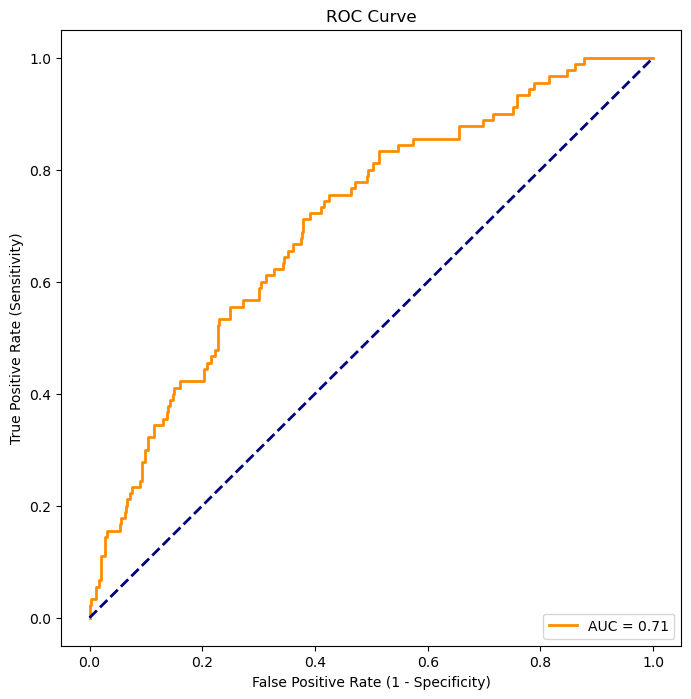

In [33]:
y_prob_selected = logreg_model_selected.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_selected, y_prob_selected)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
